# 问题定义


凭借过往用户的基本信息和消费行为数据 易速鲜花订单记录.csv ，为用户分组画像

# 数据预处理

In [1]:
import pandas as pd #导入Pandas
df_sales = pd.read_csv('易速鲜花订单记录.csv') #载入数据
df_sales.head() #显示头几行数据 

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京


## 数据可视化

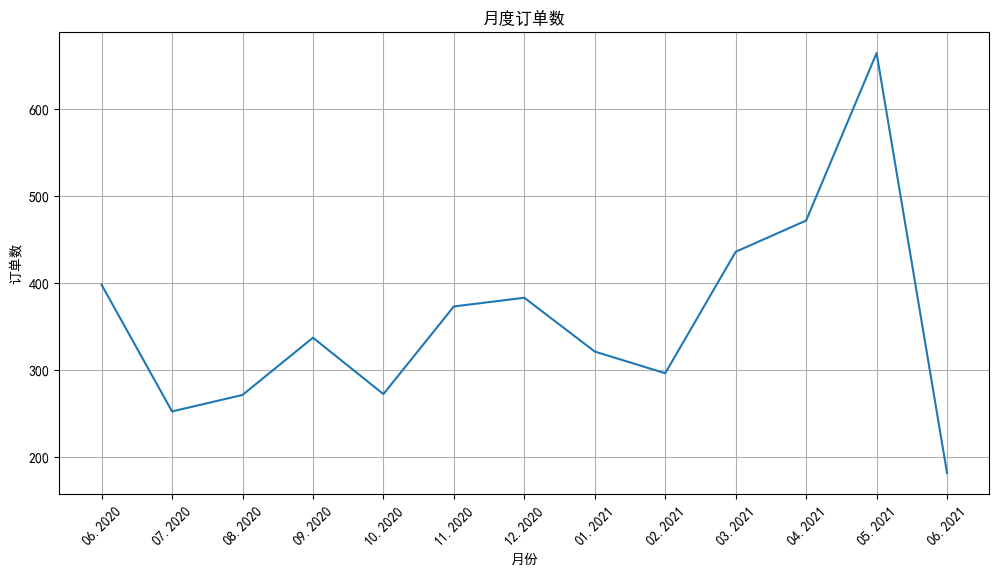

In [2]:
import matplotlib.pyplot as plt #导入Matplotlib的pyplot模块
plt.rcParams['font.family'] = ['SimHei'] #或者 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
#构建月度的订单数的DataFrame
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) #转化日期格式
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique()
#设定绘图的画布
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(12,6),legend=False)
ax.set_xlabel('月份') # X轴label
ax.set_ylabel('订单数') # Y轴Label
ax.set_title('月度订单数') # 图题
#设定X轴月份显示格式
plt.xticks(
    range(len(df_orders_monthly.index)), 
    [x.strftime('%m.%Y') for x in df_orders_monthly.index], 
    rotation=45)
plt.show() # 绘图

这段代码主要用于对某个时间段内的月度订单数据进行分析和可视化。具体来说：

1. `import matplotlib.pyplot as plt`：导入Matplotlib库的pyplot模块。Matplotlib是一个用于创建二维图表和可视化的Python库，而pyplot提供了一个简化的接口，方便创建图表。

2. `df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])`：将“df_sales”这个数据表（DataFrame）里的“消费日期”列转换为日期格式（而非字符串等其他格式）。

3. `df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique()`：这一行做了以下几件事情：
   - 将数据表（DataFrame）的索引设置为“消费日期”列；
   - 选取“订单号”列；
   - 使用`resample('M')`方法，按月对数据进行重采样。这意味着我们将数据按月份分组；
   - 使用`nunique()`方法计算每个月的唯一订单数量。这将生成一个以月份为索引的新数据表（DataFrame），值为每月的订单数。

4. 接下来，我们定义了一个绘图画布，并设置了相关的参数（尺寸、标签、标题等）：
   - 使用`pd.DataFrame(df_orders_monthly.values).plot()`方法创建一个图表。这里，我们将月度订单数据（`df_orders_monthly`）转换为一个单列的新数据表，并创建一个折线图；
   - `grid=True`表示在图表中显示网格线，而`figsize=(12, 6)`表示图表的尺寸为12x6英寸；
   - `legend=False`表示不显示图例；
   - 设置X轴和Y轴的标签；
   - 设置图表标题。

5. 设置X轴上的刻度和显示格式：
   - 使用`plt.xticks()`函数定义X轴上的刻度；
   - 使用`range(len(df_orders_monthly.index))`表示X轴刻度的位置，与月份数量相对应；
   - 使用`[x.strftime('%m.%Y') for x in df_orders_monthly.index]`将X轴刻度格式化为“MM.YYYY”的形式；
   - `rotation=45`表示X轴刻度标签的旋转角度为45°。

6. 最后，用`plt.show()`方法生成并显示图表。

## 清理数据

In [3]:
df_sales = df_sales.drop_duplicates() #删除重复的数据行

In [4]:
df_sales.isna().sum() # NaN出现的次数

订单号     0
产品码     0
消费日期    0
产品说明    0
数量      0
单价      0
用户码     0
城市      0
dtype: int64

In [5]:
df_sales.describe() #df_sales的统计信息

,数量,单价,用户码
count,85920.000000,85920.000000,85920.000000
mean,10.115747,3.599711,15338.080389
std,49.114285,134.410498,391.309086
min,-9360.000000,0.000000,14681.000000
25%,2.000000,1.250000,15022.000000
50%,4.000000,1.950000,15334.000000
75%,12.000000,3.750000,15673.000000
max,3114.000000,38970.000000,16019.000000


在这行代码中，我们使用了pandas库中的DataFrame的`describe()`方法。该方法针对数据表（DataFrame）中的数值型列（即数值数据类型的列，如int和float），生成一个描述性统计信息的表格。

`df_sales.describe()`将返回一个新的DataFrame，其中包括以下统计指标：
- count：非NaN/null值的数目（即每一列中有效值的数量）；
- mean：平均值；
- std：标准差（描述数据的离散程度）；
- min：最小值；
- 25%：第一四分位数（将数据分为四等份，这是第一个切点）；
- 50%：第二四分位数（即中位数，将数据分为两等份）；
- 75%：第三四分位数（将数据分为四等份，这是第三个切点）；
- max：最大值。

重要提示：`describe()`方法默认仅针对数值型数据计算这些统计指标。如果希望对其他类型的数据（如字符串或日期等）进行类似的操作，可以指定参数`include='all'`，如：`df_sales.describe(include='all')`。这将返回所有列的计数（count）、唯一值数（unique）、众数（top）和频数（freq）。然而，非数值列将缺少某些统计信息，如均值（mean）和标准差（std）等。

在本例中，调用`df_sales.describe()`将会为“df_sales”这个数据表生成一个包含所有数值列描述性统计信息的新数据表。

In [6]:
df_sales = df_sales.loc[df_sales['数量'] > 0] #清洗掉数量小于等于0的数据

In [7]:
df_sales.describe() #df_sales的统计信息

,数量,单价,用户码
count,84112.000000,84112.000000,84112.000000
mean,10.760236,3.005032,15337.732963
std,34.018906,15.365085,392.074855
min,1.000000,0.000000,14681.000000
25%,2.000000,1.250000,15021.000000
50%,5.000000,1.950000,15333.000000
75%,12.000000,3.750000,15674.000000
max,3114.000000,3155.950000,16019.000000


## 特征工程

In [8]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价'] #计算每单的总价
df_sales.head() #显示头几行数据  

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.5


### 构建用户层级表

In [9]:
df_user = pd.DataFrame(df_sales['用户码'].unique()) #生成以用户码为主键的结构df_user
df_user.columns = ['用户码'] #设定字段名
df_user = df_user.sort_values(by='用户码',ascending=True).reset_index(drop=True) #按用户码排序
df_user #显示df_user

,用户码
0,14681
1,14682
2,14684
3,14687
4,14688
...,...
975,16015
976,16016
977,16017
978,16018


在这段代码中，我们首先从已有的数据表（DataFrame）`df_sales`中创建了一个新的数据表`df_user`，其中包含了“用户码”列中唯一值的列表。这相当于为每个不同的用户（unique user）创建了一个ID列表。接下来，我们对这个新的数据表进行了处理，具体如下：

1. `pd.DataFrame(df_sales['用户码'].unique())`：提取`df_sales`数据表中的“用户码”列，并使用`unique()`方法得到其中的唯一值（即去重后的用户ID列表）。然后，利用这个唯一值列表创建一个新的数据表（DataFrame）`df_user`。

2. `df_user.columns = ['用户码']`：将新创建的数据表`df_user`的列名设置为“用户码”。这会生成一个单列的新数据表，其中仅包含唯一的用户ID。

3. `df_user = df_user.sort_values(by='用户码', ascending=True).reset_index(drop=True)`：对`df_user`数据表进行排序和重新设置索引：
   - 使用`sort_values(by='用户码', ascending=True)`方法对数据表按“用户码”列进行升序排序（即从小到大排序）。
   - 使用`reset_index(drop=True)`方法重置数据表的索引（index）。参数`drop=True`表示丢弃原有的索引，这样生成一个从0开始的新索引。

4. 最后，直接运行`df_user`，将显示这个经过处理的数据表。在本例中，它将显示一个包含所有唯一用户ID（按升序排列）的数据表。

### 计算R值

In [10]:
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期']) #转化日期格式
df_recent_buy = df_sales.groupby('用户码').消费日期.max().reset_index() #构建消费日期信息
df_recent_buy.columns = ['用户码','最近日期'] #设定字段名
df_recent_buy['R值'] = (df_recent_buy['最近日期'].max() - df_recent_buy['最近日期']).dt.days #计算最新日期与上次消费日期的天数
df_user = pd.merge(df_user, df_recent_buy[['用户码','R值']], on='用户码') #把上次消费距最新日期的天数（R值）合并至df_user结构
df_user.head() #显示df_user头几行数据

,用户码,R值
0,14681,70
1,14682,187
2,14684,25
3,14687,106
4,14688,7


在这段代码中，我们首先对数据表 `df_sales` 中的 "消费日期" 列进行了格式转换，然后根据每个用户的最近消费日期计算 "R值"（消费周期，即距离最新购买日期的天数），并将其添加到 `df_user` 数据表中。以下是具体步骤：

1. `df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])`：将 `df_sales` 数据表中的 "消费日期" 列转换成 pandas 的 `datetime` 类型，这样我们可以对日期执行数学运算和比较操作。

2. `df_recent_buy = df_sales.groupby('用户码').消费日期.max().reset_index()`：使用 `groupby('用户码')` 方法对 `df_sales` 数据表进行分组，以 "用户码" 列为分组依据。然后，使用 `消费日期.max()` 函数为每个用户组别提取最近的消费日期。`reset_index()` 方法重置 index，使得结果为一个新的 DataFrame，包含 "用户码" 和对应的最近消费日期。

3. `df_recent_buy.columns = ['用户码','最近日期']`：将分组后的 DataFrame 列名设为 "用户码" 和 "最近日期"。

4. `df_recent_buy['R值'] = (df_recent_buy['最近日期'].max() - df_recent_buy['最近日期']).dt.days`：计算 "R值"，即最近购买日期的距离（以天为单位）。首先找到最新的购买日期 `df_recent_buy['最近日期'].max()`，然后与每个用户的 "最近日期" 列相减，得到日期差。最后，使用 `.dt.days` 方法将结果转换为天数。

5. `df_user = pd.merge(df_user, df_recent_buy[['用户码','R值']], on='用户码')`：使用 pandas 的 `merge()` 方法将 "R值" 添加到 `df_user` 数据表中。`on='用户码'` 参数表示将两个数据表根据 "用户码" 列进行合并。

6. `df_user.head()`：显示 `df_user` 数据表的前几行，以查看添加 "R值" 后的结果。

经过上述操作，`df_user` 数据表现在包含了每个用户的唯一ID（"用户码"）和他们的消费周期（"R值" 即最近购买日期的距离）。

### 计算F值

In [11]:
df_frequency = df_sales.groupby('用户码').消费日期.count().reset_index() #计算每个用户消费次数，构建df_frequency对象
df_frequency.columns = ['用户码','F值'] #设定字段名称
df_user = pd.merge(df_user, df_frequency, on='用户码') #把消费频率整合至df_user结构
df_user.head() #显示头几行数据

,用户码,R值,F值
0,14681,70,7
1,14682,187,2
2,14684,25,390
3,14687,106,15
4,14688,7,324


在这段代码中，我们计算了每个用户的消费次数（购买频率）并将其添加到 `df_user` 数据表中。以下是具体步骤：

1. `df_frequency = df_sales.groupby('用户码').消费日期.count().reset_index()`：对 `df_sales` 数据表进行分组，以 "用户码" 列为分组依据。使用 `消费日期.count()` 函数计算每个用户组别的购买次数（消费次数）。`reset_index()` 方法重置 index，使得结果为一个新的 DataFrame，包含 "用户码" 和对应的消费次数。

2. `df_frequency.columns = ['用户码','F值']`：为新创建的 DataFrame（包含用户购买次数的数据表）设定列名，分别为 "用户码" 和 "F值"（F值表示购买频率）。

3. `df_user = pd.merge(df_user, df_frequency, on='用户码')`：将 "F值" 添加到 `df_user` 数据表中。使用 pandas 的 `merge()` 方法根据 "用户码" 列合并两个数据表。

4. `df_user.head()`：显示 `df_user` 数据表的前几行，以查看已添加 "F值"（购买频率）的结果。

经过上述操作，`df_user` 数据表现在包含了每个用户的唯一ID（"用户码"）、消费周期（"R值" 即最近购买日期的距离）以及购买频率（"F值"）。这些信息对于进一步的分析和建模非常有用。

### 计算M值

In [12]:
df_revenue = df_sales.groupby('用户码').总价.sum().reset_index() #根据消费总额，构建df_revenue对象
df_revenue.columns = ['用户码','M值'] #设定字段名称
df_user = pd.merge(df_user, df_revenue, on='用户码') #把消费金额整合至df_user结构
df_user.head() #显示头几行数据

,用户码,R值,F值,M值
0,14681,70,7,498.95
1,14682,187,2,52.00
2,14684,25,390,1201.51
3,14687,106,15,628.38
4,14688,7,324,5579.10


在这段代码中，我们计算了每个用户的消费总额并将其添加到 `df_user` 数据表中。以下是具体步骤：

1. `df_revenue = df_sales.groupby('用户码').总价.sum().reset_index()`：对 `df_sales` 数据表进行分组，以 "用户码" 列为分组依据。使用 `总价.sum()` 函数计算每个用户组别的消费总额。`reset_index()` 方法重置 index，使得结果为一个新的 DataFrame，包含 "用户码" 和对应的消费总额。

2. `df_revenue.columns = ['用户码','M值']`：为新创建的 DataFrame（包含用户消费总额的数据表）设定列名，分别为 "用户码" 和 "M值"（M值表示消费总额）。

3. `df_user = pd.merge(df_user, df_revenue, on='用户码')`：将 "M值" 添加到 `df_user` 数据表中。使用 pandas 的 `merge()` 方法根据 "用户码" 列合并两个数据表。

4. `df_user.head()`：显示 `df_user` 数据表的前几行，以查看已添加 "M值"（消费总额）的结果。

经过上述操作，`df_user` 数据表现在包含了每个用户的唯一ID（"用户码"）、消费周期（"R值" 即最近购买日期的距离）、购买频率（"F值"）以及消费总额（"M值"）。这些信息将有助于进行进一步的分析和建模。

# 使用手肘法选择K值

<Axes: title={'center': '新进度分布直方图'}, ylabel='Frequency'>

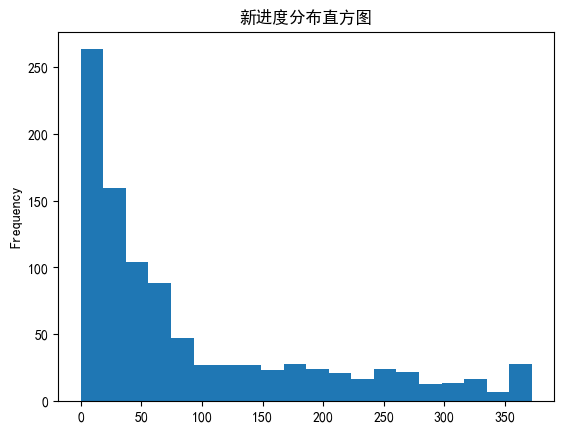

In [13]:
df_user['R值'].plot(kind='hist', bins=20, title = '新进度分布直方图') #R值直方图

在这行代码中，我们对 `df_user` 数据表中的 "R值"（消费周期，即最近购买日期的距离）列创建了一个直方图。以下是具体步骤：

1. `df_user['R值'].plot(kind='hist', bins=20, title = '新进度分布直方图')`：使用 pandas 库的 `plot()` 方法，将 "R值" 列数据绘制成直方图。设置 `kind='hist'` 表示绘制直方图，`bins=20` 表示将数据分为20个区间，`title='新进度分布直方图'` 给图表设置标题。

这个直方图可以帮助我们分析'新进度分布'，也就是不同消费周期（即用户距离上次购买的时间）的分布情况。通常，直方图可以帮助我们看出数据的概要分布，例如数据是否集中在某个区间，是否具有长尾分布等。这有助于我们了解用户的购买行为和消费周期的特征。

<Axes: title={'center': '消费频率分布直方图'}, ylabel='Frequency'>

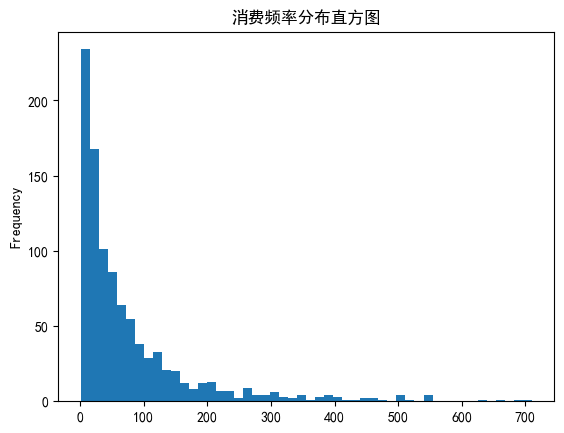

In [14]:
df_user.query('F值 < 800')['F值'].plot(kind='hist', bins=50, title = '消费频率分布直方图') #F值直方图

<Axes: title={'center': '消费金额分布直方图'}, ylabel='Frequency'>

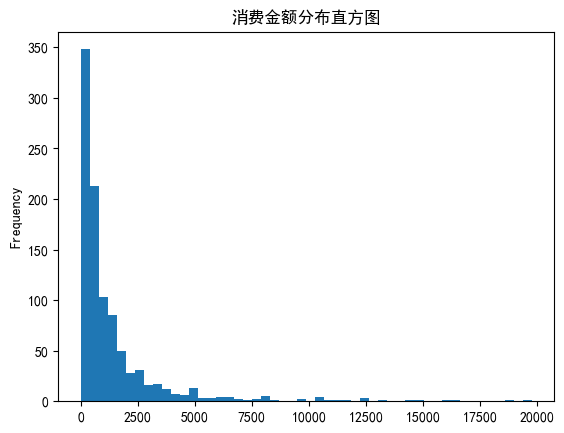

In [15]:
df_user.query('M值 < 20000')['M值'].plot(kind='hist', bins=50, title = '消费金额分布直方图') #M值直方图

In [16]:
from sklearn.cluster import KMeans #导入KMeans模块
def show_elbow(df): #定义手肘函数
    distance_list = [] #聚质心的距离（损失）
    K = range(1,9) #K值范围
    for k in K:
        kmeans = KMeans(n_clusters=k, max_iter=100) #创建KMeans模型
        kmeans = kmeans.fit(df) #拟合模型
        distance_list.append(kmeans.inertia_) #创建每个K值的损失
    plt.plot(K, distance_list, 'bx-') #绘图
    plt.xlabel('k') #X轴
    plt.ylabel('距离均方误差') #Y轴
    plt.title('k值手肘图') #标题

该代码定义了一个名为 `show_elbow()` 的函数，该函数用于显示K-Means聚类算法中每个k值（簇的数量）对应的损失/距离均方误差。这在选择合适的k值（即簇的数量）时很有用，因为在可视化后，我们可以根据所谓的 "手肘点" 来进行选择。手肘点是损失曲线弯曲的地方，也是聚类模型性能变化不再明显的地方。以下是该函数的工作原理：

1. 导入 `sklearn.cluster` 的 `KMeans` 模块。
2. 定义 `show_elbow(df)` 函数，传入要进行聚类处理的数据表 `df`。
3. 初始化一个空列表 `distance_list`，用于存储每个k值对应的损失。
4. 创建一个表示K值范围的列表 `K`，范围为1到8（不包含9）。
5. 遍历K值范围，对于每个K值：
   a. 创建一个K-Means模型，并设定 `n_clusters=k`（表示簇的数量）和 `max_iter=100`（表示最大迭代次数）。
   b. 通过 `kmeans.fit(df)` 方法对数据表 `df` 进行聚类处理。
   c. 将每个K值对应的损失（模型的 `inertia_` 属性）添加到 `distance_list` 列表中。
6. 使用Matplotlib绘制一张图，横坐标为K值，纵坐标为每个K值对应的损失。
7. 给图表添加X轴（'k'）、Y轴（'距离均方误差'）标签和标题（'k值手肘图'）。

在函数调用时，传入处理过的数据表，例如：`show_elbow(df_user)`，函数将展示手肘图。根据可视化结果选择合适的K值后，可以将其应用到K-Means模型中。

C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

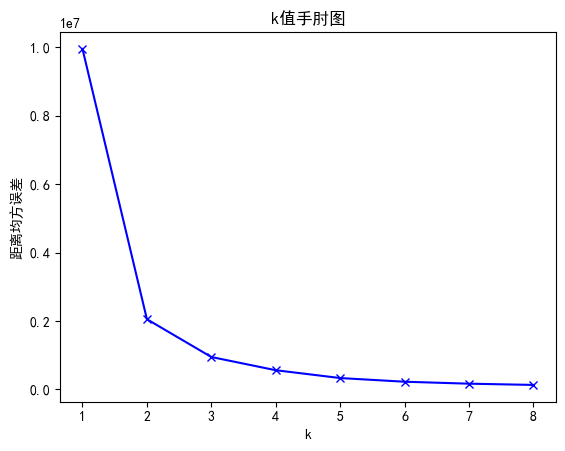

In [17]:
show_elbow(df_user[['R值']]) #显示R值聚类K值手肘图

C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

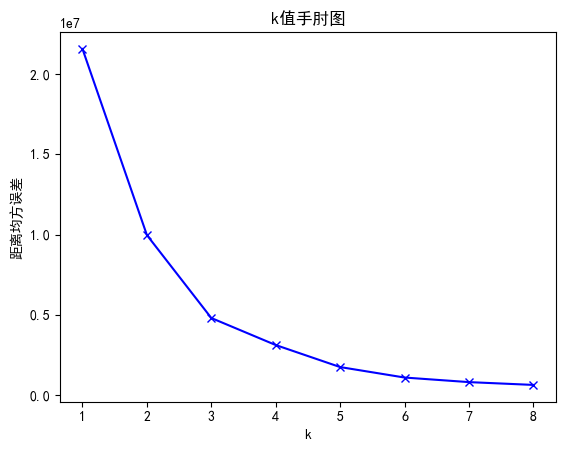

In [18]:
show_elbow(df_user[['F值']]) #显示F值聚类K值手肘图

C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

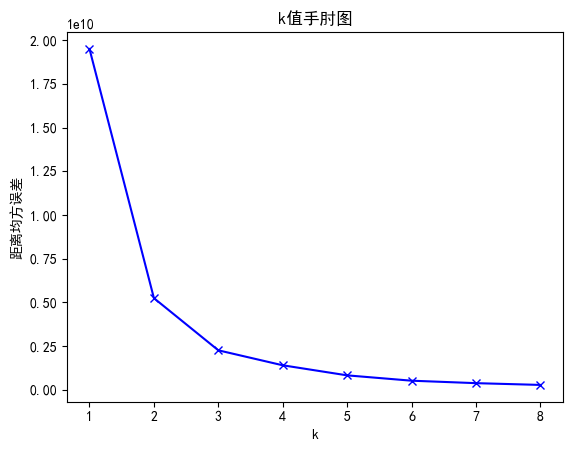

In [19]:
show_elbow(df_user[['M值']]) #显示M值聚类K值手肘图

# 使用K-Means算法创建和训练模型

In [20]:
from sklearn.cluster import KMeans #导入KMeans模块
kmeans_R = KMeans(n_clusters=3) #设定K=3
kmeans_F = KMeans(n_clusters=4) #设定K=4
kmeans_M = KMeans(n_clusters=4) #设定K=4

这段代码首先从 `sklearn.cluster` 库导入 `KMeans` 模块。然后创建了三个 K-Means 聚类模型，分别针对R值(R)，F值(F)和M值(M)（假设你不知道它们在之前的讨论中已经解释过的含义）。

1. `kmeans_R`：该模型针对用户消费周期（R值）进行聚类，使用3个聚类中心（中心数量n_clusters设为3）。
2. `kmeans_F`：该模型针对购买频率（F值）进行聚类，使用4个聚类中心（中心数量n_clusters设为4）。
3. `kmeans_M`：该模型针对消费总额（M值）进行聚类，使用4个聚类中心（中心数量n_clusters设为4）。

要使用这些模型对你的数据进行聚类，首先需要对每个模型调用 `.fit()` 方法并传入相应的数据。例如：

```python
kmeans_R.fit(df_user[['R值']])
kmeans_F.fit(df_user[['F值']])
kmeans_M.fit(df_user[['M值']])
```

随后你可以使用 `.predict()` 方法或者 `.labels_` 属性获取聚类标签，并在你的原始数据表中存储这些标签，这样就可以根据这些聚类标签对用户进行分组及分析了。例如：

```python
df_user['R-cluster'] = kmeans_R.labels_
df_user['F-cluster'] = kmeans_F.labels_
df_user['M-cluster'] = kmeans_M.labels_
```

这将在原始数据表中创建新列，分别代表每个用户属于哪个R值、F值和M值的聚类类别。

In [21]:
kmeans_R.fit(df_user[['R值']]) #拟合模型
kmeans_F.fit(df_user[['F值']]) #拟合模型
kmeans_M.fit(df_user[['M值']]) #拟合模型

C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

KMeans(n_clusters=4)

# 使用模型进行聚类

In [22]:
df_user['R值层级'] = kmeans_R.predict(df_user[['R值']]) #通过聚类模型求出R值的层级
df_user.head() #显示头几行数据

,用户码,R值,F值,M值,R值层级
0,14681,70,7,498.95,0
1,14682,187,2,52.00,2
2,14684,25,390,1201.51,0
3,14687,106,15,628.38,2
4,14688,7,324,5579.10,0


这段代码首先使用`kmeans_R.predict()`方法，根据之前训练好的`kmeans_R`模型（针对R值的聚类模型）为每个用户预测其相应的R值层级（类别）。然后，将这些预测结果添加到`df_user`数据表中的一个新列名为`'R值层级'`。

随后通过调用`df_user.head()`，展示了`df_user`数据表的前几行。这将显示出数据表的前五行（默认值），以便你可以查看新添加的'R值层级'列在数据表中的情况。

如果你已经用`.fit()`方法训练了`kmeans_R`模型，这段代码应该可以正常运行并显示数据表的前几行，包括新添加的'R值层级'列。

In [23]:
df_user.groupby('R值层级')['R值'].describe() #R值层级分组统计信息

,count,mean,std,min,25%,50%,75%,max
R值层级,,,,,,,,
0,664.0,32.088855,25.141763,0.0,10.00,25.0,50.00,94.0
1,138.0,298.094203,45.436550,231.0,255.25,292.5,334.50,372.0
2,178.0,157.162921,37.340870,95.0,126.00,156.5,188.75,225.0


# 为聚类层级进行排序

In [24]:
#定义一个order_cluster函数为聚类排序
def order_cluster(cluster_name, target_name,df,ascending=False):
    new_cluster_name = 'new_' + cluster_name #新的聚类名称
    df_new = df.groupby(cluster_name)[target_name].mean().reset_index() #按聚类结果分组，创建df_new对象
    df_new = df_new.sort_values(by=target_name,ascending=ascending).reset_index(drop=True) #排序
    df_new['index'] = df_new.index #创建索引字段
    df_new = pd.merge(df,df_new[[cluster_name,'index']], on=cluster_name) #基于聚类名称把df_new还原为df对象，并添加索引字段
    df_new = df_new.drop([cluster_name],axis=1) #删除聚类名称
    df_new = df_new.rename(columns={"index":cluster_name}) #将索引字段重命名为聚类名称字段
    return df_new #返回排序后的df_new对象

这段代码定义了一个名为`order_cluster`的函数，作用是对已经聚类后的数据进行排序。该函数接受四个输入参数：`cluster_name`（聚类名称），`target_name`（目标名称），`df`（数据表），以及`ascending`（排序顺序，默认为降序False）。

函数的主要步骤如下：

1. 设置新的聚名类名称，将“new_”前缀添加到原始聚类名称。
2. 用`groupby`方法按照`cluster_name`对数据表进行分组，并计算每组中`target_name`列的平均值。将结果存在`df_new`变量中。
3. 根据`target_name`列的值对`df_new`进行排序（升序或降序，由`ascending`参数指定，默认为降序），并重置索引。
4. 将排序后的序号赋值给新列`index`。
5. 使用`pd.merge()`，以`cluster_name`列为键将`df_new`与原始数据表`df`合并。合并后的表中包含了新的`index`列。
6. 删除原先的`cluster_name`列。
7. 将新的`index`列重命名为原始聚类名称。
8. 返回排序后的新数据表`df_new`。

该`order_cluster`函数可用于根据目标列`target_name`中的值对已经聚类后的数据进行排序。这样可以为各种分析提供有序的聚类结果。在本例中，例如你可以基于用户的R值、F值和M值聚类结果来为他们分组进行针对性的分析。

In [25]:
df_user = order_cluster('R值层级', 'R值', df_user, False) #调用簇排序函数
df_user = df_user.sort_values(by='用户码',ascending=True).reset_index(drop=True) #根据用户码排序
df_user.head() #显示头几行数据

,用户码,R值,F值,M值,R值层级
0,14681,70,7,498.95,2
1,14682,187,2,52.00,1
2,14684,25,390,1201.51,2
3,14687,106,15,628.38,1
4,14688,7,324,5579.10,2


该段代码按照以下步骤执行：

1. 使用 `order_cluster` 函数对 `'R值层级'` 列进行排序。函数以 `'R值'` 列的值作为排序依据，`df_user` 作为输入数据表，而ascend为False表示按降序排序。经过排序后，层级较高的聚类将具有较低的R值平均值。排序结果将更新`df_user`数据表。
2. 使用 `df_user.sort_values()` 函数根据 '用户码' 列对数据表进行升序排序。这样数据表的顺序会按照用户码的顺序排列。
3. 使用 `reset_index(drop=True)` 函数重置数据表的索引，使其按照排序后的新顺序排列。
4. 调用 `df_user.head()` 函数以展示数据表的前几行，从而可以查看排序后的数据表。默认情况下，head() 函数显示数据表的前五行。

经过这些步骤，你将会看到一个更新后的数据表，其中包含排序后的 "R值层级" 列，以及按照 "用户码"排列的数据。

In [26]:
df_user['F值层级'] = kmeans_F.predict(df_user[['F值']]) #通过聚类模型求出F值的层级
df_user = order_cluster('F值层级', 'F值',df_user,True) #调用簇排序函数
df_user.groupby('F值层级')['F值'].describe() #F值层级分组统计信息

,count,mean,std,min,25%,50%,75%,max
F值层级,,,,,,,,
0,720.0,32.277778,24.128263,1.0,12.00,27.0,48.25,92.0
1,203.0,152.960591,50.338738,93.0,113.50,138.0,191.50,279.0
2,50.0,417.080000,109.618232,289.0,329.75,390.0,492.50,710.0
3,7.0,1281.000000,515.121345,887.0,996.50,1112.0,1304.50,2366.0


In [27]:
df_user = df_user.sort_values(by='用户码',ascending=True).reset_index(drop=True) #根据用户码排序
df_user.head()

,用户码,R值,F值,M值,R值层级,F值层级
0,14681,70,7,498.95,2,0
1,14682,187,2,52.00,1,0
2,14684,25,390,1201.51,2,2
3,14687,106,15,628.38,1,0
4,14688,7,324,5579.10,2,2


In [28]:
df_user['M值层级'] = kmeans_M.predict(df_user[['M值']]) #通过聚类模型求出M值的层级
df_user = order_cluster('M值层级', 'M值',df_user,True) #调用簇排序函数
df_user.groupby('M值层级')['M值'].describe() #M值层级分组统计信息
df_user = df_user.sort_values(by='用户码',ascending=True).reset_index(drop=True) #根据用户码排序
df_user.head() #显示头几行数据

,用户码,R值,F值,M值,R值层级,F值层级,M值层级
0,14681,70,7,498.95,2,0,0
1,14682,187,2,52.00,1,0,0
2,14684,25,390,1201.51,2,2,0
3,14687,106,15,628.38,1,0,0
4,14688,7,324,5579.10,2,2,1


# 给用户进行整体画像

In [29]:
df_user['总分'] = df_user['R值层级'] + df_user['F值层级'] + df_user['M值层级'] #求出每个用户RFM总分
#在df_user对象中添加总体价值这个字段
df_user.loc[(df_user['总分']<=2) & (df_user['总分']>=0), '总体价值'] = '低价值' 
df_user.loc[(df_user['总分']<=4) & (df_user['总分']>=3), '总体价值'] = '中价值' 
df_user.loc[(df_user['总分']<=8) & (df_user['总分']>=5), '总体价值'] = '高价值'
df_user #显示df_user

,用户码,R值,F值,M值,R值层级,F值层级,M值层级,总分,总体价值
0,14681,70,7,498.95,2,0,0,2,低价值
1,14682,187,2,52.00,1,0,0,1,低价值
2,14684,25,390,1201.51,2,2,0,4,中价值
3,14687,106,15,628.38,1,0,0,1,低价值
4,14688,7,324,5579.10,2,2,1,5,高价值
...,...,...,...,...,...,...,...,...,...
975,16015,3,181,704.55,2,1,0,3,中价值
976,16016,2,224,1465.51,2,1,0,3,中价值
977,16017,46,32,211.88,2,0,0,2,低价值
978,16018,38,28,408.90,2,0,0,2,低价值


这段代码的目的是计算每个用户基于 RFM 层级的总分，并根据总分为用户分配总体价值标签。

步骤如下：

1. 创建一个新列 `总分`，将每个用户的 `'R值层级'`、`'F值层级'` 和 `'M值层级'` 相加以得出总分。
2. 使用 `pandas` 的 `loc[]` 函数分配总体价值标签。如果一个用户的总分在 0 到 2 之间（包括 0 和 2），则给该用户标记为 '低价值'。这一步创建了一个新列 `'总体价值'`。
3. 对于总分在 3 到 4 之间（包括 3 和 4）的用户，为其分配 `总体价值` = '中价值'。
4. 类似地，将总分在 5 到 8 之间（包括 5 和 8）的用户标记为 '高价值'。
5. 显示更新后的 `df_user` 数据表，其中包含每个用户的 RFM 总分以及相应的总体价值标签。

通过这种方式，你可以根据用户的RFM行为对其进行价值分类，进而根据用户的价值等级制定相应的营销策略，提高客户满意度和保留率。

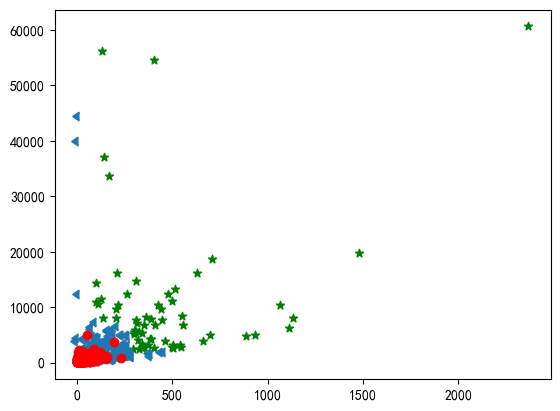

In [30]:
#显示高、中、低价值组分布散点图（F值与M值）
plt.scatter(df_user.query("总体价值 == '高价值'")['F值'],
                   df_user.query("总体价值 == '高价值'")['M值'],c='g',marker='*')
plt.scatter(df_user.query("总体价值 == '中价值'")['F值'],
                   df_user.query("总体价值 == '中价值'")['M值'],marker=8)
plt.scatter(df_user.query("总体价值 == '低价值'")['F值'],
                   df_user.query("总体价值 == '低价值'")['M值'],c='r')

这段代码使用`matplotlib.pyplot`库（缩写为`plt`），根据用户的F值（购买频率）和M值（消费总额）绘制按总体价值分类的散点图。绿色星号表示高价值用户，蓝色圆圈表示中价值用户，红色色正方形表示低价值用户。

以下是绘图的具体步骤：

1. 使用`plt.scatter()`函数绘制高价值用户的散点图。通过`df_user.query("总体价值 == '高价值'")['F值']`筛选出高价值用户的F值（购买频率），`df_user.query("总体价值 == '高价值'")['M值']`筛选出高价值用户的M值（消费总额）。将散点的颜色设置为绿色（'g'），并使用星形（'*'）标记高价值用户。

2. 使用`plt.scatter()`函数绘制中价值用户的散点图。通过`df_user.query("总体价值 == '中价值'")['F值']`筛选出中价值用户的F值（购买频率），`df_user.query("总体价值 == '中价值'")['M值']`筛选出中价值用户的M值（消费总额）。默认颜色为蓝色，散点标记使用数字 8（默认圆圈形状）。

3. 使用`plt.scatter()`函数绘制低价值用户的散点图。通过`df_user.query("总体价值 == '低价值'")['F值']`筛选出低价值用户的F值（购买频率），`df_user.query("总体价值 == '低价值'")['M值']`筛选出低价值用户的M值（消费总额）。将散点的颜色设置为红色（'r'）。

注意，如果要显示散点图，请在代码末尾加入`plt.show()`函数。你还可以根据需要对图形进行更多定制，如添加标题、轴标签、图例等。